# The Battle Of Neighborhoods - Week 2

### Part 1: Exploring New York City

In [1]:
!pip install geopy
!pip install folium
print("Libraries downloaded!!")

     |████████████████████████████████| 92kB 5.8MB/s eta 0:00:011
Libraries downloaded!!


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Libraries imported.


In [3]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [11]:
neighborhoods.to_csv('BON1_NYC_GEO.csv',index=False)

In [12]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [13]:
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

### Part 2: Web Scrapping of Population and Demographics data of New York City from Wiki

In [14]:
!pip install bs4

from bs4 import BeautifulSoup

  Stored in directory: /home/dsxuser/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [15]:
website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable'})

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('BON2_POPULATION1.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

In [18]:
Pop_data=pd.read_csv('BON2_POPULATION1.csv')
Pop_data.drop(Pop_data.columns[[7,8,9,10,11]], axis=1,inplace=True)
print('Data downloaded!')
Pop_data.head()

Data downloaded!


,New York City's five boroughsvte,Jurisdiction,Population,Gross Domestic Product,Land area,Density,Borough,squarekm,persons / sq. mi,persons /km2
0,The Bronx\n,\n Bronx\n,"1,432,132\n",42.695\n,"29,200\n",42.10\n,109.04\n,NaN,NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,582,830\n",91.559\n,"34,600\n",70.82\n,183.42\n,NaN,NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,701\n",600.244\n,"360,900\n",22.83\n,59.13\n,NaN,NaN,NaN
3,Queens\n,\n Queens\n,"2,278,906\n",93.310\n,"39,600\n",108.53\n,281.09\n,NaN,NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,179\n",14.514\n,"30,300\n",58.37\n,151.18\n,NaN,NaN,NaN


In [19]:
Pop_data.columns = Pop_data.columns.str.replace(' ', '')
Pop_data.columns = Pop_data.columns.str.replace('\'','')
Pop_data.rename(columns={'Borough':'persons_sq_mi','County':'persons_sq_km'}, inplace=True)
Pop_data.head()

,NewYorkCitysfiveboroughsvte,Jurisdiction,Population,GrossDomesticProduct,Landarea,Density,persons_sq_mi,squarekm,persons/sq.mi,persons/km2
0,The Bronx\n,\n Bronx\n,"1,432,132\n",42.695\n,"29,200\n",42.10\n,109.04\n,NaN,NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,582,830\n",91.559\n,"34,600\n",70.82\n,183.42\n,NaN,NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,701\n",600.244\n,"360,900\n",22.83\n,59.13\n,NaN,NaN,NaN
3,Queens\n,\n Queens\n,"2,278,906\n",93.310\n,"39,600\n",108.53\n,281.09\n,NaN,NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,179\n",14.514\n,"30,300\n",58.37\n,151.18\n,NaN,NaN,NaN


In [20]:
Pop_data.rename(columns = {'NewYorkCitysfiveboroughsvte\n' : 'Borough',
                   'Jurisdiction\n':'County',
                   'Population\n':'Estimate_2017', 
                   'Landarea\n':'square_miles',
                    'Density\n':'square_km'}, inplace=True)
Pop_data.head()

,Borough,County,Estimate_2017,GrossDomesticProduct,square_miles,square_km,persons_sq_mi,squarekm,persons/sq.mi,persons/km2
0,The Bronx\n,\n Bronx\n,"1,432,132\n",42.695\n,"29,200\n",42.10\n,109.04\n,NaN,NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,582,830\n",91.559\n,"34,600\n",70.82\n,183.42\n,NaN,NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,701\n",600.244\n,"360,900\n",22.83\n,59.13\n,NaN,NaN,NaN
3,Queens\n,\n Queens\n,"2,278,906\n",93.310\n,"39,600\n",108.53\n,281.09\n,NaN,NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,179\n",14.514\n,"30,300\n",58.37\n,151.18\n,NaN,NaN,NaN


In [23]:
Pop_data['Borough']=Pop_data['Borough'].replace(to_replace='\n', value='', regex=True)
Pop_data['County']=Pop_data['County'].replace(to_replace='\n', value='', regex=True)
Pop_data['Estimate_2017']=Pop_data['Estimate_2017'].replace(to_replace='\n', value='', regex=True)
#Pop_data['GrossDomesticProduct']=Pop_data['GrossDomesticProduct'].replace(to_replace='\n', value='', regex=True)
Pop_data['square_miles']=Pop_data['square_miles'].replace(to_replace='\n', value='', regex=True)
Pop_data['square_km']=Pop_data['square_km'].replace(to_replace='\n', value='', regex=True)
Pop_data['persons_sq_mi']=Pop_data['persons_sq_mi'].replace(to_replace='\n', value='', regex=True)
Pop_data['square_km']=Pop_data['square_km'].replace(to_replace='\n', value='', regex=True)
Pop_data.head()

,Borough,County,Estimate_2017,GrossDomesticProduct,square_miles,square_km,persons_sq_mi,squarekm,persons/sq.mi,persons/km2
0,The Bronx,Bronx,"1,432,132",42.695\n,"29,200",42.10,109.04,NaN,NaN,NaN
1,Brooklyn,Kings,"2,582,830",91.559\n,"34,600",70.82,183.42,NaN,NaN,NaN
2,Manhattan,New York,"1,628,701",600.244\n,"360,900",22.83,59.13,NaN,NaN,NaN
3,Queens,Queens,"2,278,906",93.310\n,"39,600",108.53,281.09,NaN,NaN,NaN
4,Staten Island,Richmond,"476,179",14.514\n,"30,300",58.37,151.18,NaN,NaN,NaN


In [24]:
Pop_data.loc[5:,['persons_sq_mi','square_km']] = Pop_data.loc[2:,['persons_sq_mi','square_km']].shift(1,axis=1)
Pop_data.loc[5:,['square_km','persons_sq_mi']] = Pop_data.loc[2:,['square_km','persons_sq_mi']].shift(1,axis=1)
Pop_data.loc[5:,['square_miles','square_km']] = Pop_data.loc[2:,['square_miles','square_km']].shift(1,axis=1)
Pop_data.loc[5:,['Estimate_2017','square_miles']] = Pop_data.loc[2:,['Estimate_2017','square_miles']].shift(1,axis=1)
Pop_data.loc[5:,['County','Estimate_2017']] = Pop_data.loc[2:,['County','Estimate_2017']].shift(1,axis=1)
Pop_data.loc[5:,['Borough','County']] = Pop_data.loc[2:,['Borough','County']].shift(1,axis=1)
Pop_data.head()

,Borough,County,Estimate_2017,GrossDomesticProduct,square_miles,square_km,persons_sq_mi,squarekm,persons/sq.mi,persons/km2
0,The Bronx,Bronx,"1,432,132",42.695\n,"29,200",42.10,109.04,NaN,NaN,NaN
1,Brooklyn,Kings,"2,582,830",91.559\n,"34,600",70.82,183.42,NaN,NaN,NaN
2,Manhattan,New York,"1,628,701",600.244\n,"360,900",22.83,59.13,NaN,NaN,NaN
3,Queens,Queens,"2,278,906",93.310\n,"39,600",108.53,281.09,NaN,NaN,NaN
4,Staten Island,Richmond,"476,179",14.514\n,"30,300",58.37,151.18,NaN,NaN,NaN


In [25]:
Pop_data = Pop_data.fillna('')
Pop_data.head()

,Borough,County,Estimate_2017,GrossDomesticProduct,square_miles,square_km,persons_sq_mi,squarekm,persons/sq.mi,persons/km2
0,The Bronx,Bronx,"1,432,132",42.695\n,"29,200",42.10,109.04,,,
1,Brooklyn,Kings,"2,582,830",91.559\n,"34,600",70.82,183.42,,,
2,Manhattan,New York,"1,628,701",600.244\n,"360,900",22.83,59.13,,,
3,Queens,Queens,"2,278,906",93.310\n,"39,600",108.53,281.09,,,
4,Staten Island,Richmond,"476,179",14.514\n,"30,300",58.37,151.18,,,


In [26]:
i = Pop_data[((Pop_data.County == 'Sources: [2] and see individual borough articles'))].index
Pop_data.drop(i)

,Borough,County,Estimate_2017,GrossDomesticProduct,square_miles,square_km,persons_sq_mi,squarekm,persons/sq.mi,persons/km2
0,The Bronx,Bronx,"1,432,132",42.695\n,"29,200",42.10,109.04,,,
1,Brooklyn,Kings,"2,582,830",91.559\n,"34,600",70.82,183.42,,,
2,Manhattan,New York,"1,628,701",600.244\n,"360,900",22.83,59.13,,,
3,Queens,Queens,"2,278,906",93.310\n,"39,600",108.53,281.09,,,
4,Staten Island,Richmond,"476,179",14.514\n,"30,300",58.37,151.18,,,
5,,City of New York,"8,398,748","97,700",842.343,302.64,"28,188",,,
6,,State of New York,"19,745,289","85,700","1,701.399","47,214",416.4,,,
7,,Sources:[14] and see individual borough articles,,,,,,,,


In [27]:
Pop_data.to_csv('BON2_POPULATION.csv',index=False)

In [36]:
website_url = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable collapsible collapsed mw-collapsible mw-made-collapsible'})
print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('NYC_DEMO.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   New York City - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XqR8YApAMNEAA82iXNIAAABG","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"New_York_City","wgTitle":"New York City","wgCurRevisionId":952581842,"wgRevisionId":952581842,"wgArticleId":645042,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia articles incorporating a citation from the 1911 Encyclopaedia Britannica with Wikisource reference","Webarchive template wayback links","CS1 maint: ref=ha

AttributeError: 'NoneType' object has no attribute 'find_all'

In [44]:
with open('NYC_DEMO.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

Demo_data=pd.read_csv('NYC_DEMO.csv')
print('Data downloaded!')

Data downloaded!


In [45]:
Demo_data

,New York City's five boroughsvte,Jurisdiction,Population,Gross Domestic Product,Land area,Density,Borough,County,Estimate (2018)[12],billions(US$)[13],per capita(US$),square miles,squarekm,persons / sq. mi,persons /km2
0,The Bronx\n,\n Bronx\n,"1,432,132\n",42.695\n,"29,200\n",42.10\n,109.04\n,"34,653\n","13,231\n",NaN,NaN,NaN,NaN,NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,582,830\n",91.559\n,"34,600\n",70.82\n,183.42\n,"37,137\n","14,649\n",NaN,NaN,NaN,NaN,NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,701\n",600.244\n,"360,900\n",22.83\n,59.13\n,"72,033\n","27,826\n",NaN,NaN,NaN,NaN,NaN,NaN
3,Queens\n,\n Queens\n,"2,278,906\n",93.310\n,"39,600\n",108.53\n,281.09\n,"21,460\n","8,354\n",NaN,NaN,NaN,NaN,NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,179\n",14.514\n,"30,300\n",58.37\n,151.18\n,"8,112\n","3,132\n",NaN,NaN,NaN,NaN,NaN,NaN
5,City of New York,"8,398,748",842.343,"97,700",302.64,783.83,"28,188","10,947\n",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,State of New York,"19,745,289","1,701.399","85,700","47,214","122,284",416.4,159\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
Demo_data.rename(columns = {'2010[237]' : '2010',
                   '1990[239]':'1990',
                   '1970[239]':'1970', 
                   '1940[239]\n':'1940',
                    }, inplace=True)
Demo_data

,New York City's five boroughsvte,Jurisdiction,Population,Gross Domestic Product,Land area,Density,Borough,County,Estimate (2018)[12],billions(US$)[13],per capita(US$),square miles,squarekm,persons / sq. mi,persons /km2
0,The Bronx\n,\n Bronx\n,"1,432,132\n",42.695\n,"29,200\n",42.10\n,109.04\n,"34,653\n","13,231\n",NaN,NaN,NaN,NaN,NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,582,830\n",91.559\n,"34,600\n",70.82\n,183.42\n,"37,137\n","14,649\n",NaN,NaN,NaN,NaN,NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,701\n",600.244\n,"360,900\n",22.83\n,59.13\n,"72,033\n","27,826\n",NaN,NaN,NaN,NaN,NaN,NaN
3,Queens\n,\n Queens\n,"2,278,906\n",93.310\n,"39,600\n",108.53\n,281.09\n,"21,460\n","8,354\n",NaN,NaN,NaN,NaN,NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,179\n",14.514\n,"30,300\n",58.37\n,151.18\n,"8,112\n","3,132\n",NaN,NaN,NaN,NaN,NaN,NaN
5,City of New York,"8,398,748",842.343,"97,700",302.64,783.83,"28,188","10,947\n",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,State of New York,"19,745,289","1,701.399","85,700","47,214","122,284",416.4,159\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
Demo_data.to_csv('BON2_DEMOGRAPHICS.csv',index=False)

### Part 3: New York City and its Borough Cuisines Dataset

In [48]:
!pip install wordcloud

     |████████████████████████████████| 368kB 15.9MB/s eta 0:00:01


In [49]:
from PIL import Image # converting images into arrays
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.0.2
Wordcloud is installed and imported!


In [50]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_01ee215c0bc74c44a1ff105519971645 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LzeC3f9N1lgK-j5yiEKML6OBS_bJDA84y-GxZK8swK6U',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_01ee215c0bc74c44a1ff105519971645.get_object(Bucket='battleofneighborhoodsweek2-donotdelete-pr-prehffscza1enm',Key='Cuisine.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,The Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Avenu..."
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,"Filipino (formerly Irish, less so today)"


In [51]:
df_data_0.shape

(57, 3)

In [52]:
print(df_data_0.Borough.unique())

['The Bronx' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan']


In [53]:
df_data_0['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Manhattan,13
Queens,13
The Bronx,9
Staten Island,3


In [54]:
CUISINE_WC = df_data_0[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,"Italian, Albanian (also known as ""Arthur Avenu..."
2,"Italian, Seafood"
3,"Italian, Albanian"
4,"Filipino (formerly Irish, less so today)"
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [55]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [56]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

In [57]:
stopwords = set(STOPWORDS)

In [58]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

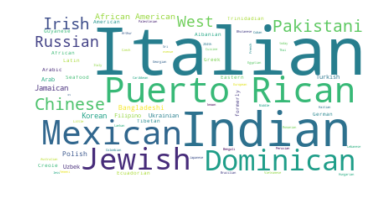

<Figure size 2160x3240 with 0 Axes>

In [59]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


#### Most Preferred Food in New York City -

* Italian

* Purto Rican

* Mexican

* Jewish

* Indian

* Pakistani

* Dominican


### Brooklyn Cuisines WordCloud

In [60]:
Brooklyn_data = df_data_0[df_data_0['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst;,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani and Ukra..."


In [61]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani and Ukra..."
5,"Puerto Rican, Mexican, Dominican, and Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,"African-American, Dominican, and Puerto Rican"


In [62]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)

In [63]:
BRL_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BRL_CUISINE_WC.generate(BR_CUISINE_WC)

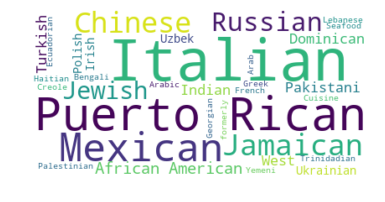

<Figure size 2160x3240 with 0 Axes>

In [64]:
plt.imshow(BRL_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

#### Most Preferred Food in Brooklyn is -

* Italian

* Purto Rican

* Mexican



### Queens Cuisine WordCloud

In [65]:
Queens_data = df_data_0[df_data_0['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E..."
1,Queens,Bellerose,Indian and Pakistani
2,Queens,Flushing,Chinese and Korean
3,Queens,Forest Hills; Kew Gardens Hills; Rego Park,"Jewish, Russian and Uzbek"
4,Queens,Howard Beach; Ozone Park,Italian


In [66]:
Q_WC = Queens_data[['Cuisine']]
Q_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,Indian and Pakistani
2,Chinese and Korean
3,"Jewish, Russian and Uzbek"
4,Italian
5,German and Polish
6,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."
7,"Bangladeshi, Caribbean; African-American; Afri..."
8,"Arab, Chinese, and Italian"
9,"Indian, Guyanese, Trinidadian, Pakistani, Bang..."


In [67]:
Q_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)
Q_WC = open('Q_CUISINE.txt', 'r').read()
stopwords = set(STOPWORDS)

In [68]:
Q_WC_NYC= WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_WC_NYC.generate(Q_WC)

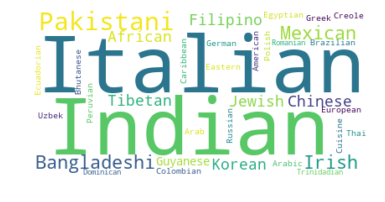

<Figure size 2160x3240 with 0 Axes>

In [69]:
plt.imshow(Q_WC_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

#### Most Preferred Food in Queens is -

* Indian

* Italian

* Irish

* Pakistani

* Mexican



### Manhattan Cuisine WordCloud

In [71]:
Man_data = df_data_0[df_data_0['Borough']=='Manhattan'].reset_index(drop=True)
Man_data.head()

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,Chinese and Vietnamese
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cub..."
2,Manhattan,East Village,"Japanese, Korean, Indian and Ukrainian"
3,Manhattan,Greenwich Village,Italian and Middle Eastern
4,Manhattan,Harlem,"Italian, African-American, Latin American, We..."


In [73]:
Man_data_wc = Man_data[['Cuisine']]
Man_data_wc

,Cuisine
0,Chinese and Vietnamese
1,"Puerto Rican, Mexican, Dominican, Chinese-Cub..."
2,"Japanese, Korean, Indian and Ukrainian"
3,Italian and Middle Eastern
4,"Italian, African-American, Latin American, We..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican, Jewish, Italian, and Latin Amer..."
9,"Indian, Pakistani and Bangladeshi"


In [74]:
Man_data_wc.to_csv('Man_cuisine.txt', sep=',', index=False)
Man_data_wc = open('Man_cuisine.txt', 'r').read()

In [75]:
stopword= set(STOPWORDS)

In [76]:
Man_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

Man_NYC.generate(Man_data_wc)

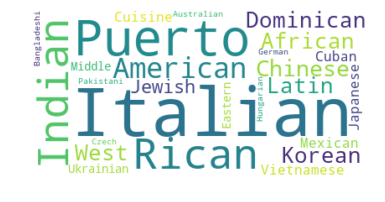

<Figure size 2160x3240 with 0 Axes>

In [77]:
plt.imshow(Man_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()



#### Most Preferred Food in Manhattan is -

* Italian

* American

* Puerto Rican

* Indian



### Bronx Cuisine WordCloud

In [79]:
Br_data = df_data_0[df_data_0['Borough']=='The Bronx'].reset_index(drop=True)
Br_data

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,The Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Avenu..."
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,"Filipino (formerly Irish, less so today)"
5,The Bronx,Riverdale,Jewish
6,The Bronx,South Bronx,"Puerto Rican, Dominican"
7,The Bronx,Wakefield,"Jamaican, West Indian"
8,The Bronx,Woodlawn,Irish


In [80]:
Br_wc = Br_data[['Cuisine']]
Br_wc

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,"Italian, Albanian (also known as ""Arthur Avenu..."
2,"Italian, Seafood"
3,"Italian, Albanian"
4,"Filipino (formerly Irish, less so today)"
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [81]:
Br_wc.to_csv('Br_cusine.txt', sep=',', index=False)
Br_wc = open('Br_cusine.txt','r').read()
stopwords = set(STOPWORDS)

In [82]:
Br_NYC = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords=stopwords
)
Br_NYC.generate(Br_wc)

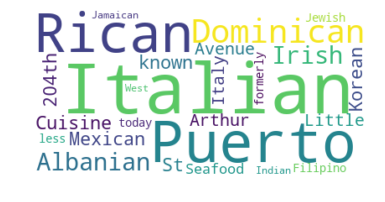

<Figure size 2160x3240 with 0 Axes>

In [83]:
plt.imshow(Br_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

#### Most Preferred Food in The Bronx is -

* Italian

* Puerto Rican

* Albanian

* Dominican



### Part 4: Explore Farmers Market

In [87]:

body = client_01ee215c0bc74c44a1ff105519971645.get_object(Bucket='battleofneighborhoodsweek2-donotdelete-pr-prehffscza1enm',Key='DOHMH_Farmers_Markets.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
fm_nyc = pd.read_csv(body)
fm_nyc.head()


,Borough,Market Name,Service Category,Service Type,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Farmers Markets and Food Boxes,Farmers Markets,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,Farmers Markets and Food Boxes,Food Boxes,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,Farmers Markets and Food Boxes,Farmers Markets,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,Farmers Markets and Food Boxes,Farmers Markets,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


In [88]:
fm_nyc.rename(columns={'Service Type':'Service_Type'}, inplace=True)
fm_nyc.rename(columns={'Market Name':'FacilityName'}, inplace=True)
print(fm_nyc.Service_Type.unique())

['Farmers Markets' 'Food Boxes']


In [89]:
fm_nyc['Service_Type'].value_counts().to_frame()

,Service_Type
Farmers Markets,121
Food Boxes,17


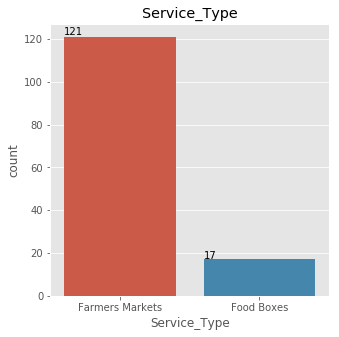

In [92]:
import seaborn as sns
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Service_Type',data=fm_nyc)
ax.set_title("Service_Type")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [93]:
# FM_NYC_filtered - Dataset with only Farmers Market
FM_NYC_filtered = fm_nyc[fm_nyc['Service_Type'] == 'Farmers Markets'].copy()
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()

(121, 15)


,Borough,FacilityName,Service Category,Service_Type,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Farmers Markets and Food Boxes,Farmers Markets,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
3,Manhattan,Greenmarket at Oculus Plaza,Farmers Markets and Food Boxes,Farmers Markets,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,Farmers Markets and Food Boxes,Farmers Markets,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"
5,Bronx,CS211 Go!Healthy Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,1919 Prospect Ave,40.843546,-73.889755,Wednesday,2:30 - 5:30 p.m.,07/08/2019- 11/22/2019,Yes,No,No,No,"(40.843546, -73.889755)"


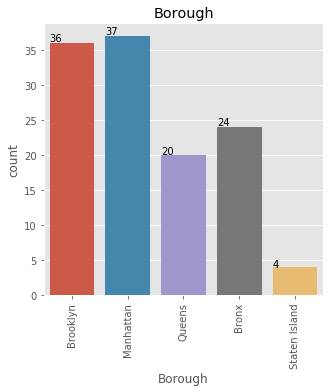

In [94]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [95]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [96]:
#create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC_filtered['Latitude'], FM_NYC_filtered['Longitude'], FM_NYC_filtered['FacilityName'], FM_NYC_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets